In [4]:
!pip install .

Processing d:\documents\aiforgood\epi-model\epi-models
  Created wheel for epi-models: filename=epi_models-0.1-py3-none-any.whl size=13893 sha256=801aea08944991007ace0fc2361e86877cd9072ef292e22bf1072ccb13022895
  Stored in directory: c:\users\alifbros\appdata\local\pip\cache\wheels\f1\02\b4\6403e72ee65f32afc80630173107283f858aa6d67563cc7e24
Successfully built epi-models


In [2]:
from epi_models import (
    DeterministicCompartmentalModel, 
    DeterministicCompartmentalModelRunner,
    DeterministicCompartmentalModelScenario,
    SingleInterventionScenario, 
    CampParams,
)

In [7]:
camp_params = CampParams.load_from_json(".//epi_models//config//sample_input.json")

In [8]:
runner = DeterministicCompartmentalModelRunner(camp_params)

In [9]:
runner.do_nothing_scenario.__dict__

{'baseline_param_dict': {'transmission_reduction_factor': 1,
  'isolation_capacity': 0.0,
  'remove_symptomatic_rate': 0.0,
  'first_high_risk_category_n': 2,
  'remove_high_risk_rate': 0.0,
  'icu_capacity': 0.0003,
  'infection_matrix': array([[ 4.22809072,  0.76683669,  0.69660451,  1.69675934,  0.9419763 ,
           0.40558608,  0.26184182,  0.13495187],
         [ 1.03261083, 10.05606702,  1.01280489,  1.14206231,  1.56232239,
           0.46542807,  0.1387554 ,  0.10195448],
         [ 0.47648793,  1.33730962,  5.13565028,  2.80824944,  2.01839376,
           1.07529096,  0.15740874,  0.09723487],
         [ 1.69258432,  1.33778696,  2.53743288,  5.44312577,  2.97093189,
           1.23122415,  0.43175245,  0.19069098],
         [ 0.8846813 ,  2.10324815,  1.90233514,  3.04133909,  3.86404601,
           1.23801107,  0.30903475,  0.21044958],
         [ 0.92895678,  1.68534637,  1.71733168,  1.98331471,  2.14926742,
           2.2260002 ,  0.57990652,  0.25079698],
         [ 0.

In [10]:
runner.camp_baseline.__dict__

{'baseline_param_dict': {'transmission_reduction_factor': 0.9375,
  'isolation_capacity': 0.01,
  'remove_symptomatic_rate': 0.01,
  'first_high_risk_category_n': 1,
  'remove_high_risk_rate': 0.01,
  'icu_capacity': 0.0003,
  'infection_matrix': array([[ 4.22809072,  0.76683669,  0.69660451,  1.69675934,  0.9419763 ,
           0.40558608,  0.26184182,  0.13495187],
         [ 1.03261083, 10.05606702,  1.01280489,  1.14206231,  1.56232239,
           0.46542807,  0.1387554 ,  0.10195448],
         [ 0.47648793,  1.33730962,  5.13565028,  2.80824944,  2.01839376,
           1.07529096,  0.15740874,  0.09723487],
         [ 1.69258432,  1.33778696,  2.53743288,  5.44312577,  2.97093189,
           1.23122415,  0.43175245,  0.19069098],
         [ 0.8846813 ,  2.10324815,  1.90233514,  3.04133909,  3.86404601,
           1.23801107,  0.30903475,  0.21044958],
         [ 0.92895678,  1.68534637,  1.71733168,  1.98331471,  2.14926742,
           2.2260002 ,  0.57990652,  0.25079698],
     

In [11]:
runner.generated_params_df.shape

(1000, 12)

In [12]:
assert runner.model.infection_matrix.shape == (8, 8)

In [13]:
do_nothing_baseline, camp_baseline = runner.run_baselines()

In [14]:
better_hygiene_intervention_result, increase_icu_intervention_result, increase_remove_high_risk_result, \
               better_isolation_intervention_result, shiexlding_intervention_result = runner.run_different_scenarios()

In [15]:
better_hygiene_intervention_result = runner.run_better_hygiene_scenarios()

In [16]:
better_hygiene_intervention_result.keys()

dict_keys(['5%|one_month', '5%|three_month', '5%|six_month', '10%|one_month', '10%|three_month', '10%|six_month', '15%|one_month', '15%|three_month', '15%|six_month'])

In [17]:
do_nothing_baseline = do_nothing_baseline * camp_params.total_population

In [74]:
do_nothing_baseline['Time']

0            0
1        20000
2        40000
3        60000
4        80000
        ...   
196    3920000
197    3940000
198    3960000
199    3980000
200    4000000
Name: Time, Length: 201000, dtype: int32

In [18]:
camp_baseline = camp_baseline * camp_params.total_population

In [19]:
sim_groups = do_nothing_baseline.groupby('R0')

In [58]:
for i in range(len(do_nothing_baseline.columns)):
    print(i, do_nothing_baseline.columns[i])

0 Susceptible: 0-9
1 Exposed: 0-9
2 Infected (symptomatic): 0-9
3 Asymptomatically Infected: 0-9
4 Recovered: 0-9
5 Hospitalised: 0-9
6 Critical: 0-9
7 Deaths: 0-9
8 Offsite: 0-9
9 Quarantined: 0-9
10 No ICU Care: 0-9
11 Susceptible: 10-19
12 Exposed: 10-19
13 Infected (symptomatic): 10-19
14 Asymptomatically Infected: 10-19
15 Recovered: 10-19
16 Hospitalised: 10-19
17 Critical: 10-19
18 Deaths: 10-19
19 Offsite: 10-19
20 Quarantined: 10-19
21 No ICU Care: 10-19
22 Susceptible: 20-29
23 Exposed: 20-29
24 Infected (symptomatic): 20-29
25 Asymptomatically Infected: 20-29
26 Recovered: 20-29
27 Hospitalised: 20-29
28 Critical: 20-29
29 Deaths: 20-29
30 Offsite: 20-29
31 Quarantined: 20-29
32 No ICU Care: 20-29
33 Susceptible: 30-39
34 Exposed: 30-39
35 Infected (symptomatic): 30-39
36 Asymptomatically Infected: 30-39
37 Recovered: 30-39
38 Hospitalised: 30-39
39 Critical: 30-39
40 Deaths: 30-39
41 Offsite: 30-39
42 Quarantined: 30-39
43 No ICU Care: 30-39
44 Susceptible: 40-49
45 Exposed

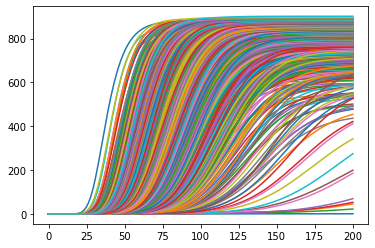

In [20]:
for index,group in sim_groups:
    group['Deaths'].plot()

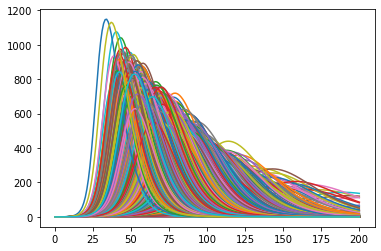

In [34]:
for index,group in sim_groups:
    group['Hospitalised'].plot()

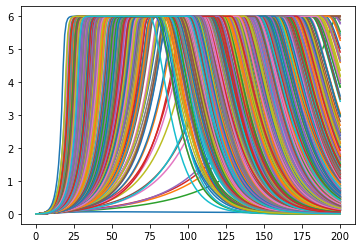

In [35]:
for index,group in sim_groups:
    group['Critical'].plot()

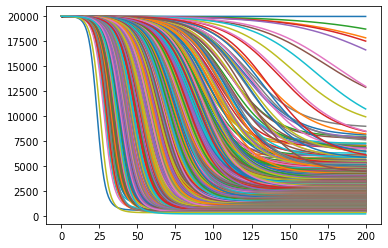

In [36]:
for index,group in sim_groups:
    group['Susceptible'].plot()

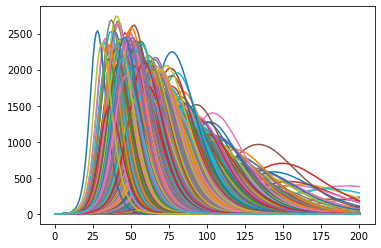

In [37]:
for index,group in sim_groups:
    group['Infected (symptomatic)'].plot()

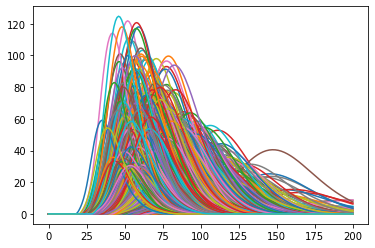

In [38]:
for index,group in sim_groups:
    group['No ICU Care'].plot()

In [39]:
sim_groups_camp = camp_baseline.groupby('R0')

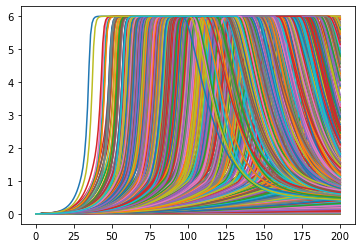

In [40]:
for index,group in sim_groups_camp:
    group['Critical'].plot()

In [41]:
camp_baseline.columns

Index(['Susceptible: 0-9', 'Exposed: 0-9', 'Infected (symptomatic): 0-9',
       'Asymptomatically Infected: 0-9', 'Recovered: 0-9', 'Hospitalised: 0-9',
       'Critical: 0-9', 'Deaths: 0-9', 'Offsite: 0-9', 'Quarantined: 0-9',
       ...
       'Exposed', 'Infected (symptomatic)', 'Asymptomatically Infected',
       'Recovered', 'Hospitalised', 'Critical', 'Deaths', 'Offsite',
       'Quarantined', 'No ICU Care'],
      dtype='object', length=106)

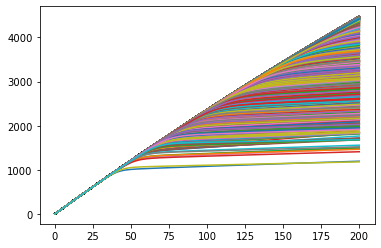

In [42]:
for index,group in sim_groups_camp:
    group['Offsite'].plot()

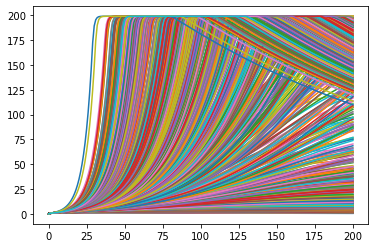

In [43]:
for index,group in sim_groups_camp:
    group['Quarantined'].plot()

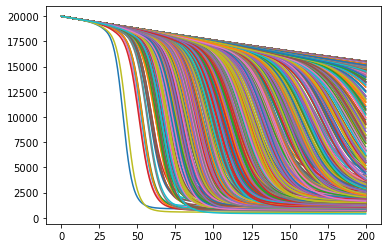

In [44]:
for index,group in sim_groups_camp:
    group['Susceptible'].plot()

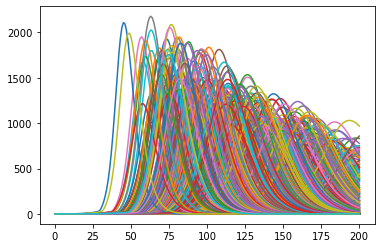

In [45]:
for index,group in sim_groups_camp:
    group['Infected (symptomatic)'].plot()

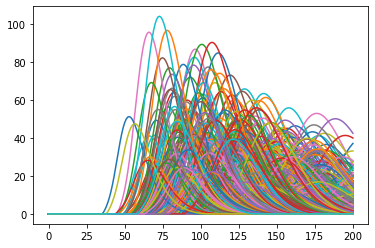

In [46]:
for index,group in sim_groups_camp:
    group['No ICU Care'].plot()

In [ ]:
#TODO: now need to test if all the interventions are working well

### Import the compartmental model and tinker with a few options
1. Single interventions
* better hygiene
* remove symptomatic (test out if the capacity implementation is working)
* increase ICU
* remove high risk
* shielding

In [26]:
# test with less iterations for sure 1000 is a nightmare to plot 

In [47]:
camp_params.total_population

20000

In [48]:
model = DeterministicCompartmentalModel(camp_params)

In [49]:
better_hygiene_6_month = SingleInterventionScenario(camp_params.total_population, [0], [180], model.infection_matrix, transmission_reduction_factor_inter=0.7)

In [50]:
%%time
better_hygiene_6_month_results = model.run_single_simulation(better_hygiene_6_month, num_iterations=100)

TypeError: run_single_simulation() got an unexpected keyword argument 'num_iterations'

In [51]:
better_hygiene_6_month_results = camp_params.total_population * better_hygiene_6_month_results

NameError: name 'better_hygiene_6_month_results' is not defined

In [ ]:
better_hygiene_6_month_groups = better_hygiene_6_month_results.groupby('R0')

In [ ]:
for index,group in better_hygiene_6_month_groups:
    group['Infected (symptomatic)'].plot()

In [ ]:
for index,group in better_hygiene_6_month_groups:
    group['Deaths'].plot()

In [ ]:
for index,group in better_hygiene_6_month_groups:
    group['Hospitalised'].plot()

In [ ]:
for index,group in better_hygiene_6_month_groups:
    group['Susceptible'].plot()

In [ ]:
# test isolation
iso_6_month = SingleInterventionScenario(camp_params.total_population, [0], [180], model.infection_matrix, isolation_capacity_inter=10000, remove_symptomatic_rate_inter=10)

In [ ]:
%%time
iso_6_month_results = model.run_single_simulation(iso_6_month, num_iterations=100)

In [ ]:
iso_6_month_results = camp_params.total_population * iso_6_month_results
iso_6_month_results_groups = iso_6_month_results.groupby('R0')

In [ ]:
for index,group in iso_6_month_results_groups:
    group['Quarantined'].plot()

In [ ]:
for index,group in iso_6_month_results_groups:
    (group['Infected (symptomatic)']+group['Quarantined']).plot()

In [17]:
# the Infected dynamics is tinted while they are in quarantine - needs a better solution to deal with this (maybe extra compartments is the answer like the Tucker model)